# **Read the File**

## Set up

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Mar 28 03:42:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    52W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
#Import Modules

from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from google.colab.patches import cv2_imshow
import pandas as pd
from keras.applications import vgg16
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Dropout, Layer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image, display
import matplotlib.cm as cm

## Mount the google drive and unzip the file

In [9]:
# Move the Covid-19 Zip File from Google Drive into Content Folder
os.chdir("/content/drive/MyDrive")
!mv COVID-19-Dataset.zip /content

In [10]:
#Change the directory to content and unzip the file
os.chdir("/content")
!unzip COVID-19-Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19 Dataset/X-ray/Non-COVID/01.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/010.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0100.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0101.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0102.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0103.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0104.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0105.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0106.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0107.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0108.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0109.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/011.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0110.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0111.jpeg  
  inflating: COVID-19 Dataset/X-ray/Non-COVID/0112.jpeg  
  inflating: COVID-19 Dat

## Loading the pics and labels into lists

In [5]:
#Read the paths of covid x-ray pictures
os.chdir("/content/COVID-19 Dataset/X-ray/COVID")
imagePaths = os.listdir("/content/COVID-19 Dataset/X-ray/COVID")

In [6]:
#Put the covid x-ray pictures and labels into lists
data = []
labels = []

for imagePath in imagePaths:    
    label = 1  
    image = cv2.imread(imagePath)     
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    image = cv2.resize(image, (224, 224))    
    data.append(image)    
    labels.append(label)

In [7]:
#Read the paths of non covid x-ray pictures
imagePaths = os.listdir("/content/COVID-19 Dataset/X-ray/Non-COVID")
os.chdir("/content/COVID-19 Dataset/X-ray/Non-COVID")

In [8]:
#Put the non-covid x-ray pictures and labels into lists
for imagePath in imagePaths:    
    label = 0  
    image = cv2.imread(imagePath)     
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    image = cv2.resize(image, (224, 224))    
    data.append(image)    
    labels.append(label)

In [9]:
#Check the number of pictures
print(len(data))
print(len(labels))

9544
9544


In [10]:
#Make the lable list into a ndarry
labels = np.array(labels)

In [11]:
#Make the picture list into a ndarry and normalize
data = np.array(data,dtype=np.float32)/255

In [12]:
#Categorize the label 
labels =keras.utils.to_categorical(labels)

## Train/Test Split

In [13]:
# Split the train and test data
(trainX, testX, trainY, testY) = train_test_split(data,
                                                  labels,
                                                  test_size=0.2,
                                                  # stratify=labels,
                                                  random_state=42,
                                                  shuffle=True
                                                  )

In [14]:
#Check the lenghth of the train/test sets
print("Length of TrainX:" ,len(trainX))
print("Length of TestX:" ,len(testX))
print("Length of TrainY:" ,len(trainY))
print("Length of TestY:" ,len(testY))

Length of TrainX: 7635
Length of TestX: 1909
Length of TrainY: 7635
Length of TestY: 1909


In [15]:
#Check the shape of item in the train sets
print(trainX[0].shape)
print(trainY[0].shape)

(224, 224, 3)
(2,)


# **Data Augmentation**

In [ ]:
# augmentation = keras.preprocessing.image.ImageDataGenerator(rotation_range=15,
#                                                   # width_shift_range=0.2,
#                                                   # height_shift_range=0.2,
#                                                   # shear_range=0.2,
#                                                   # zoom_range=0.2,
#                                                       horizontal_flip=True,
#                                                       fill_mode='nearest')

# **Model Building/Compiling**

## Model Building

In [18]:
#Build the function to construct the moels
def build_model(layer1_n,layer2_n):

  if model_select_id == "base":
    
    baseModel=model_select
    
    for layer in baseModel.layers:
      layer.trainable = False
      
      
    headModel = baseModel.output
    headModel = tf.keras.layers.Flatten(name="flatten")(headModel)
    headModel = Dense(2, activation="softmax")(headModel)

    model = keras.Model(inputs=baseModel.input, outputs=headModel)
    
    
  elif model_select_id == "structure1":
    
    baseModel=model_select
    
    for layer in baseModel.layers:
      layer.trainable = False

    headModel = baseModel.output
    headModel = Dense(layer1_n, activation="relu")(headModel)
    headModel = Dropout(0.2)(headModel)
    headModel = Dense(layer2_n, activation="relu")(headModel)
    headModel = Dropout(0.2)(headModel)
    headModel = tf.keras.layers.Flatten(name="flatten")(headModel)
    headModel = Dense(2, activation="softmax")(headModel)

    model = keras.Model(inputs=baseModel.input, outputs=headModel)
    

  elif model_select_id == "structure2":

    baseModel=model_select

    for layer in baseModel.layers:
      layer.trainable = False

    headModel = baseModel.output
    headModel = tf.keras.layers.Conv2D(filters=64,activation="relu",kernel_size=3)(headModel) 
    headModel = tf.keras.layers.MaxPooling2D(pool_size=2)(headModel)
    headModel = tf.keras.layers.Flatten(name="flatten")(headModel)
    headModel = Dense(2, activation="softmax")(headModel)

    model = keras.Model(inputs=baseModel.input, outputs=headModel)
    

  elif model_select_id == "structure3":
    
    baseModel=model_select

    for layer in baseModel.layers:
      layer.trainable = False

    headModel = baseModel.output
    headModel = Dense(256, activation="relu")(headModel)
    headModel = tf.keras.layers.Conv2D(filters=64,activation="relu",kernel_size=3)(headModel)
    headModel = tf.keras.layers.MaxPooling2D(pool_size=2)(headModel)
    headModel = Dense(32, activation="relu")(headModel)
    headModel = tf.keras.layers.Flatten(name="flatten")(headModel)
    headModel = Dense(2, activation="softmax")(headModel)

    model = keras.Model(inputs=baseModel.input, outputs=headModel)

  model.compile(optimizer=optimizer,
                loss=loss_function,
                metrics=["accuracy"])

  return model





## Model Compiling

In [144]:
def compile_model(model,optimizer,loss_function):
  
  model.compile(optimizer=optimizer, loss=loss_function,metrics=(keras.metrics.Recall(),
                                                                 keras.metrics.Precision(),
                                                                 keras.metrics.CategoricalAccuracy(),
                                                                 keras.metrics.AUC()
                                                                 ))
  return model

## Model Training

In [145]:
def train_model(model, X_train, Y_train,num_epochs,batch_size):

  history = model.fit(trainX, trainY, batch_size=batch_size, validation_split = 0.2, epochs=num_epochs)
  
  return model, history

# **Model Execution**

## Hyper-Parameter Set up

In [19]:
optimizer='SGD'
loss_function='CategoricalCrossentropy'
num_epochs=20
batch_size=32
dropout=0.2


## Model Training

### Base Model ResNet50

In [147]:
model_select_id = "base"
model_select=keras.applications.ResNet50(input_shape=(224,224,3),include_top=False,weights='imagenet')

model_trained = build_model(model_select_id,model_select)
model_trained.summary()
model_trained = compile_model(model_trained,optimizer,loss_function)
model_trained, history = train_model(model_trained, trainX, trainY, num_epochs, batch_size)

model_trained.evaluate(testX,testY,return_dict=True)

Model: "model_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_27 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_27[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

{'auc_11': 0.6795238256454468,
 'categorical_accuracy': 0.675222635269165,
 'loss': 54.00859451293945,
 'precision_17': 0.675222635269165,
 'recall_17': 0.675222635269165}

In [148]:
pred_Y = model_trained.predict(testX)

print('classification report:')
print('\n')
print(classification_report(testY.argmax(axis=1),pred_Y.argmax(axis=1)))

classification report:


              precision    recall  f1-score   support

           0       0.95      0.45      0.61      1088
           1       0.57      0.97      0.72       821

    accuracy                           0.68      1909
   macro avg       0.76      0.71      0.67      1909
weighted avg       0.79      0.68      0.66      1909



### Base Model ResNet101V2

In [149]:
model_select_id = "base"
model_select=keras.applications.ResNet101V2(input_shape=(224,224,3),include_top=False,weights='imagenet')

model_trained=build_model(model_select_id,model_select)
model_trained.summary()
model_trained = compile_model(model_trained,optimizer,loss_function)
model_trained, history = train_model(model_trained, trainX, trainY, num_epochs, batch_size)

model_trained.evaluate(testX,testY,return_dict=True)

Model: "model_24"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_28[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
___________________________________________________________________________________________

{'auc_12': 0.9324344396591187,
 'categorical_accuracy': 0.9303300380706787,
 'loss': 4.403188228607178,
 'precision_18': 0.9303300380706787,
 'recall_18': 0.9303300380706787}

In [150]:
pred_Y = model_trained.predict(testX)

print('classification report:')
print('\n')
print(classification_report(testY.argmax(axis=1),pred_Y.argmax(axis=1)))

classification report:


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1088
           1       0.93      0.91      0.92       821

    accuracy                           0.93      1909
   macro avg       0.93      0.93      0.93      1909
weighted avg       0.93      0.93      0.93      1909



### Base Model DenseNet121

In [184]:
model_select_id = "base"
model_select=keras.applications.DenseNet121(input_shape=(224,224,3),include_top=False,weights='imagenet')

model_trained=build_model(model_select_id,model_select)
model_trained.summary()
model_trained = compile_model(model_trained,optimizer,loss_function)
model_trained, history = train_model(model_trained, trainX, trainY, num_epochs, batch_size)

model_trained.evaluate(testX,testY,return_dict=True)

Model: "model_32"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_38 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_34 (ZeroPadding2 (None, 230, 230, 3)  0           input_38[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_34[0][0]          
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
___________________________________________________________________________________________

In [152]:
pred_Y = model_trained.predict(testX)

print('classification report:')
print('\n')
print(classification_report(testY.argmax(axis=1),pred_Y.argmax(axis=1)))

classification report:


              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1088
           1       0.91      0.94      0.92       821

    accuracy                           0.93      1909
   macro avg       0.93      0.93      0.93      1909
weighted avg       0.93      0.93      0.93      1909



### Base Model VGG19

In [153]:
model_select_id = "base"
model_select=keras.applications.VGG19(input_shape=(224,224,3),include_top=False,weights='imagenet')

model_trained=build_model(model_select_id,model_select)
model_trained.summary()
model_trained = compile_model(model_trained,optimizer,loss_function)
model_trained, history = train_model(model_trained, trainX, trainY, num_epochs, batch_size)

model_trained.evaluate(testX,testY,return_dict=True)

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

{'auc_14': 0.9083260893821716,
 'categorical_accuracy': 0.8632792234420776,
 'loss': 1.1387017965316772,
 'precision_20': 0.8632792234420776,
 'recall_20': 0.8632792234420776}

In [154]:
pred_Y = model_trained.predict(testX)

print('classification report:')
print('\n')
print(classification_report(testY.argmax(axis=1),pred_Y.argmax(axis=1)))

classification report:


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1088
           1       0.93      0.74      0.82       821

    accuracy                           0.86      1909
   macro avg       0.88      0.85      0.86      1909
weighted avg       0.87      0.86      0.86      1909



### Base Model InceptionV3

In [155]:
model_select_id = "base"
model_select=keras.applications.InceptionV3(input_shape=(224,224,3),include_top=False,weights='imagenet')

model_trained=build_model(model_select_id,model_select)
model_trained.summary()
model_trained = compile_model(model_trained,optimizer,loss_function)
model_trained, history = train_model(model_trained, trainX, trainY, num_epochs, batch_size)

model_trained.evaluate(testX,testY,return_dict=True)

Model: "model_27"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_108 (Conv2D)             (None, 111, 111, 32) 864         input_31[0][0]                   
__________________________________________________________________________________________________
batch_normalization_98 (BatchNo (None, 111, 111, 32) 96          conv2d_108[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_98[0][0]     
___________________________________________________________________________________________

{'auc_15': 0.9198014736175537,
 'categorical_accuracy': 0.9099004864692688,
 'loss': 2.4791343212127686,
 'precision_21': 0.9099004864692688,
 'recall_21': 0.9099004864692688}

In [156]:
pred_Y = model_trained.predict(testX)

print('classification report:')
print('\n')
print(classification_report(testY.argmax(axis=1),pred_Y.argmax(axis=1)))

classification report:


              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1088
           1       0.93      0.86      0.89       821

    accuracy                           0.91      1909
   macro avg       0.91      0.90      0.91      1909
weighted avg       0.91      0.91      0.91      1909



### Base Model Xception

In [157]:
model_select_id = "base"
model_select=keras.applications.Xception(input_shape=(224,224,3),include_top=False,weights='imagenet')

model_trained=build_model(model_select_id,model_select)
model_trained.summary()
model_trained = compile_model(model_trained,optimizer,loss_function)
model_trained, history = train_model(model_trained, trainX, trainY, num_epochs, batch_size)

model_trained.evaluate(testX,testY,return_dict=True)

Model: "model_28"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_32 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_32[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

{'auc_16': 0.9521705508232117,
 'categorical_accuracy': 0.9376636743545532,
 'loss': 0.8487677574157715,
 'precision_22': 0.9376636743545532,
 'recall_22': 0.9376636743545532}

In [158]:
pred_Y = model_trained.predict(testX)

print('classification report:')
print('\n')
print(classification_report(testY.argmax(axis=1),pred_Y.argmax(axis=1)))

classification report:


              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1088
           1       0.90      0.96      0.93       821

    accuracy                           0.94      1909
   macro avg       0.93      0.94      0.94      1909
weighted avg       0.94      0.94      0.94      1909



### DenseNet121 with a Head Model of Structure1

In [20]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [21]:
layer1_n = [32,64,128]
layer2_n = [32,64,128]
dp_rate1 = [0,0.2,0.3]
dp_rate2 = [0,0.2,0.3]
model_select_id = 'structure1'
model_select = keras.applications.DenseNet121(input_shape=(224,224,3),include_top=False,weights='imagenet')

In [22]:
model_CV = KerasClassifier(build_fn=build_model, epochs=2, batch_size=32, verbose=1)

In [23]:

param_grid = dict(layer1_n=layer1_n,layer2_n=layer2_n)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=None, cv=5)
grid_result = grid.fit(trainX, trainY)

Epoch 1/2
191/191 [==============================] - 35s 62ms/step - loss: 0.5920 - accuracy: 0.7184
Epoch 2/2
48/48 [==============================] - 6s 68ms/step - loss: 0.2941 - accuracy: 0.8710
Epoch 1/2
191/191 [==============================] - 19s 60ms/step - loss: 0.5635 - accuracy: 0.7111
Epoch 2/2
48/48 [==============================] - 5s 59ms/step - loss: 0.2706 - accuracy: 0.8847
Epoch 1/2
191/191 [==============================] - 19s 60ms/step - loss: 0.5656 - accuracy: 0.7290
Epoch 2/2
48/48 [==============================] - 6s 60ms/step - loss: 0.3966 - accuracy: 0.8166
Epoch 1/2
191/191 [==============================] - 19s 60ms/step - loss: 0.5426 - accuracy: 0.7376
Epoch 2/2
48/48 [==============================] - 6s 59ms/step - loss: 0.2928 - accuracy: 0.8762
Epoch 1/2
191/191 [==============================] - 19s 60ms/step - loss: 0.5374 - accuracy: 0.7247
Epoch 2/2
48/48 [==============================] - 6s 59ms/step - loss: 0.2884 - accuracy: 0.8821
Epoch

In [25]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.897708 using {'layer1_n': 64, 'layer2_n': 128}


In [250]:
model_select_id = "structure1"
model_select=keras.applications.DenseNet121(input_shape=(224,224,3),include_top=False,weights='imagenet')

model_trained=build_model(model_select_id,model_select)
model_trained.summary()
model_trained = compile_model(model_trained,optimizer,loss_function)
model_trained, history = train_model(model_trained, trainX, trainY, num_epochs, batch_size)

model_trained.evaluate(testX,testY,return_dict=True)

ValueError: ignored

In [ ]:
pred_Y = model_trained.predict(testX)

print('classification report:')
print('\n')
print(classification_report(testY.argmax(axis=1),pred_Y.argmax(axis=1)))

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

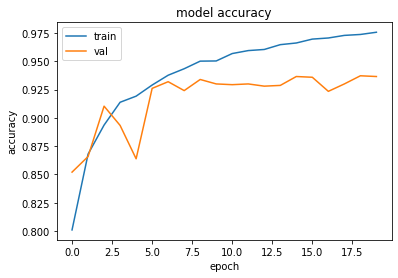

In [162]:
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### DenseNet121 with a Head Model of Structure2

In [163]:
model_select_id = "structure2"
model_select=keras.applications.DenseNet121(input_shape=(224,224,3),include_top=False,weights='imagenet')

model_trained=build_model(model_select_id,model_select)
model_trained.summary()
model_trained = compile_model(model_trained,optimizer,loss_function)
model_trained, history = train_model(model_trained, trainX, trainY, num_epochs, batch_size)

model_trained.evaluate(testX,testY,return_dict=True)

Model: "model_30"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_34 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_26 (ZeroPadding2 (None, 230, 230, 3)  0           input_34[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_26[0][0]          
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
___________________________________________________________________________________________

{'auc_18': 0.9749200344085693,
 'categorical_accuracy': 0.9298061728477478,
 'loss': 0.2305745631456375,
 'precision_24': 0.9298061728477478,
 'recall_24': 0.9298061728477478}

In [ ]:
pred_Y = model_trained.predict(testX)

print('classification report:')
print('\n')
print(classification_report(testY.argmax(axis=1),pred_Y.argmax(axis=1)))

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### DenseNet121 with a Head Model of Structure3

In [ ]:
model_select_id = "structure3"
model_select=keras.applications.DenseNet121(input_shape=(224,224,3),include_top=False,weights='imagenet')

model_trained=build_model(model_select_id,model_select)
model_trained.summary()
model_trained = compile_model(model_trained,optimizer,loss_function)
model_trained, history = train_model(model_trained, trainX, trainY, num_epochs, batch_size)

model_trained.evaluate(testX,testY,return_dict=True)

In [168]:
pred_Y = model_trained.predict(testX)

print('classification report:')
print('\n')
print(classification_report(testY.argmax(axis=1),pred_Y.argmax(axis=1)))

classification report:


              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1088
           1       0.91      0.93      0.92       821

    accuracy                           0.93      1909
   macro avg       0.93      0.93      0.93      1909
weighted avg       0.93      0.93      0.93      1909



In [ ]:
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

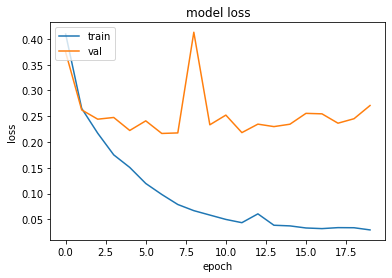

In [170]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Model Evaluation**

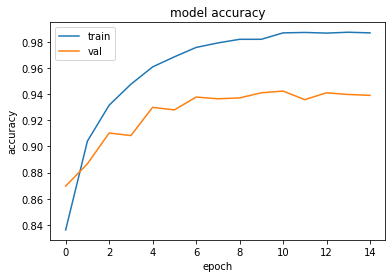

In [79]:
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

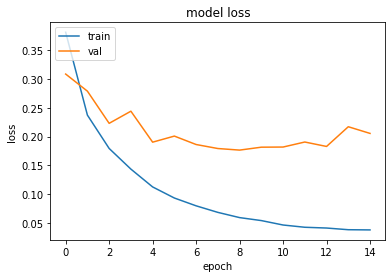

In [80]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [84]:
pred_Y = model.predict(testX)

print('classification report:')
print('\n')
print(classification_report(testY.argmax(axis=1),pred_Y.argmax(axis=1)))

Confusion Matrix:


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1088
           1       0.92      0.92      0.92       821

    accuracy                           0.93      1909
   macro avg       0.93      0.93      0.93      1909
weighted avg       0.93      0.93      0.93      1909



# **HeatMap**

In [ ]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

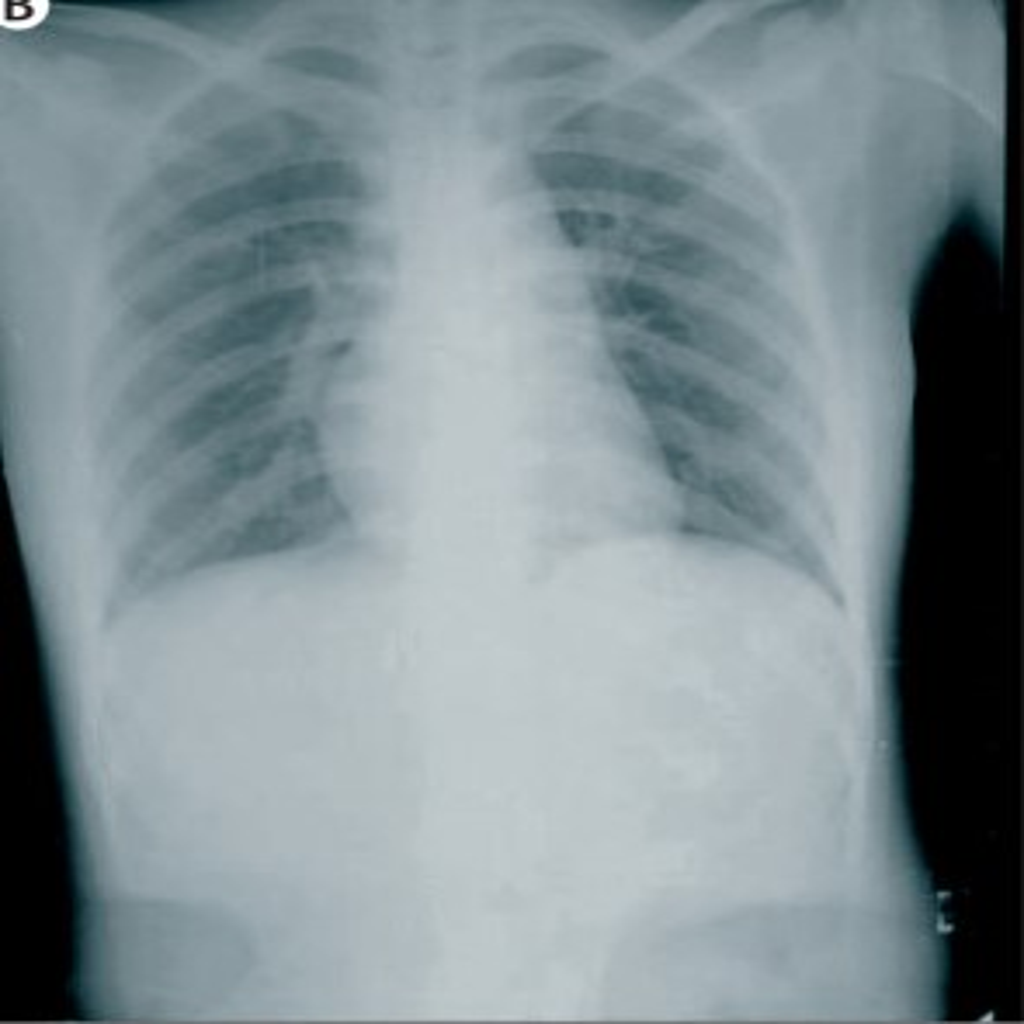

In [ ]:
# model_builder = keras.applications.xception.Xception
img_size = (224, 224)
preprocess_input = tf.keras.applications.vgg19.preprocess_input
decode_predictions = tf.keras.applications.vgg19.decode_predictions

last_conv_layer_name = "conv2d_5"

# The local path to our target image
img_path = '/content/COVID-19 Dataset/X-ray/COVID/COVID-19 (103).png'

display(Image(img_path))

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 224x224
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (224, 224, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
  
    array = np.expand_dims(array, axis=0)
    return array

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


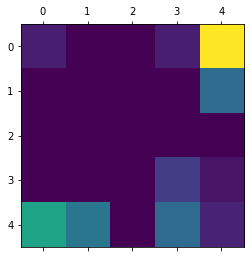

In [ ]:
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
# model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
# print("Predicted:", decode_predictions(preds)[0])

# # Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

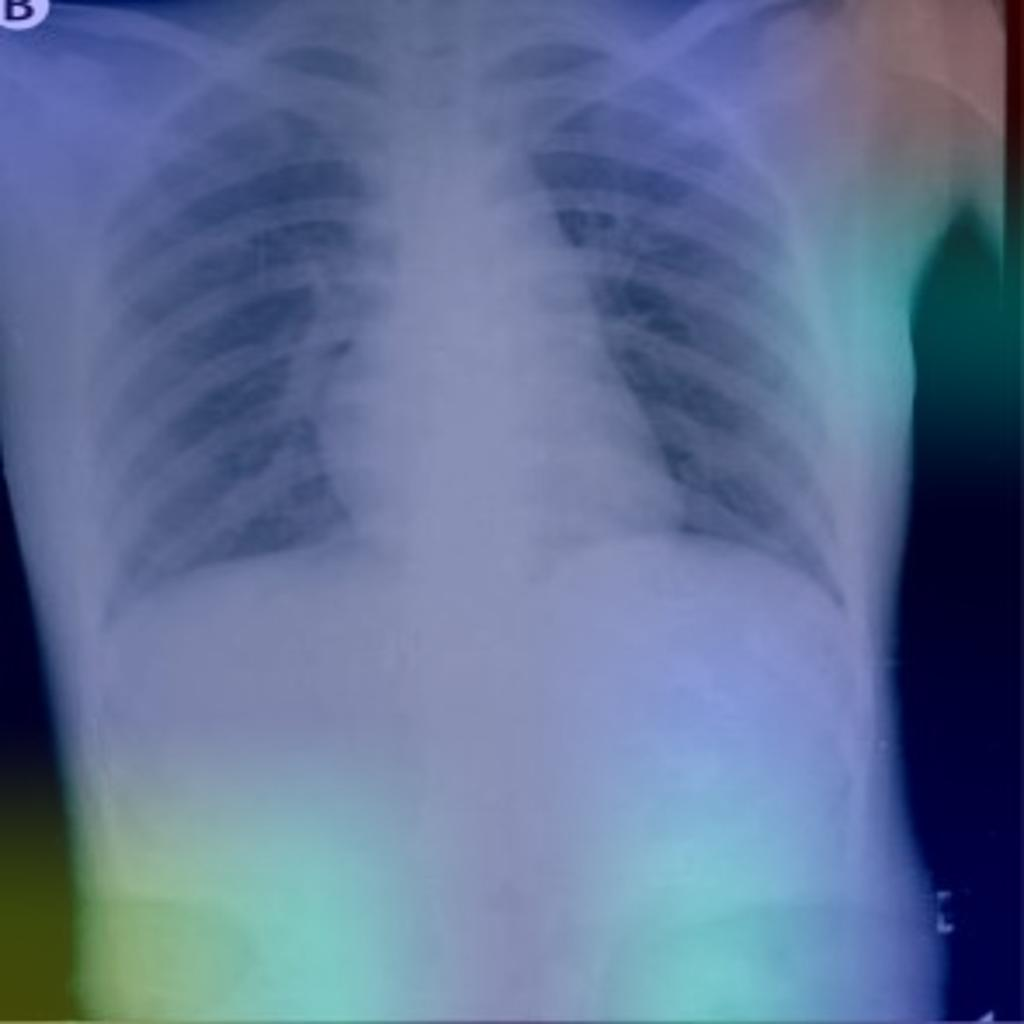

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)